# Data Science Internship @ LetsGrowMore

LGMVIP - Jan 2022

By Revathy K D S

Task 2: Exploratory Data Analysis on Dataset - Terrorism

Level : Intermediate Task

Language: Python

IDE: Jupyter Notebook

## Import the required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read the dataset

In [2]:
ter = pd.read_csv("globalterrorism.csv")
ter.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
ter.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
ter.shape

(181691, 135)

In [5]:
ter.rename(columns = {'iyear': 'Year', 'imonth': 'Month', 'iday': 'day', 'gname':'Group', 'country_txt': 'Country', 'region_txt': 'Region', 'provstate': 'State', 'city': 'City', 'attacktype1_txt': 'AttackType', 'targtype1_txt': 'Targettype', 'weaptype1_txt': 'Weapon', 'nkill': 'kill', 'nwound':'Wound'}, inplace =True)

In [6]:
ter = ter[['Year', 'Month', 'day','Country', 'State', 'Region', 'City' ,'kill','latitude', 'longitude','AttackType', 'Wound', 'target1','summary', 'Group', 'Targettype', 'Weapon', 'motive' ]]

In [7]:
ter.head()

,Year,Month,day,Country,State,Region,City,kill,latitude,longitude,AttackType,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,1.0,18.456792,-69.951164,Assassination,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,0.0,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,1.0,15.478598,120.599741,Assassination,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,NaN,37.997490,23.762728,Bombing/Explosion,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,NaN,33.580412,130.396361,Facility/Infrastructure Attack,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
ter.describe()

,Year,Month,day,kill,latitude,longitude,Wound
count,181691.000000,181691.000000,181691.000000,171378.000000,177135.000000,1.771340e+05,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,23.498343,-4.586957e+02,3.167668
std,13.259430,3.388303,8.814045,11.545741,18.569242,2.047790e+05,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,11.510046,4.545640e+00,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,34.685087,6.871033e+01,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,74.633553,1.793667e+02,8191.000000


### Checking Null values

In [9]:
ter.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
kill           10313
latitude        4556
longitude       4557
AttackType         0
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [10]:
ter['Wound'] = ter['Wound'].fillna(0)
ter['kill'] = ter['kill'].fillna(0)

In [11]:
ter['Casualities'] = ter['kill'] + ter['Wound']

In [12]:
ter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   kill         181691 non-null  float64
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Wound        181691 non-null  float64
 12  target1      181055 non-null  object 
 13  summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Targettype   181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  181691 non-

## Visualization

Text(0.5, 1.0, 'Falalities and Non Fatalities for US')

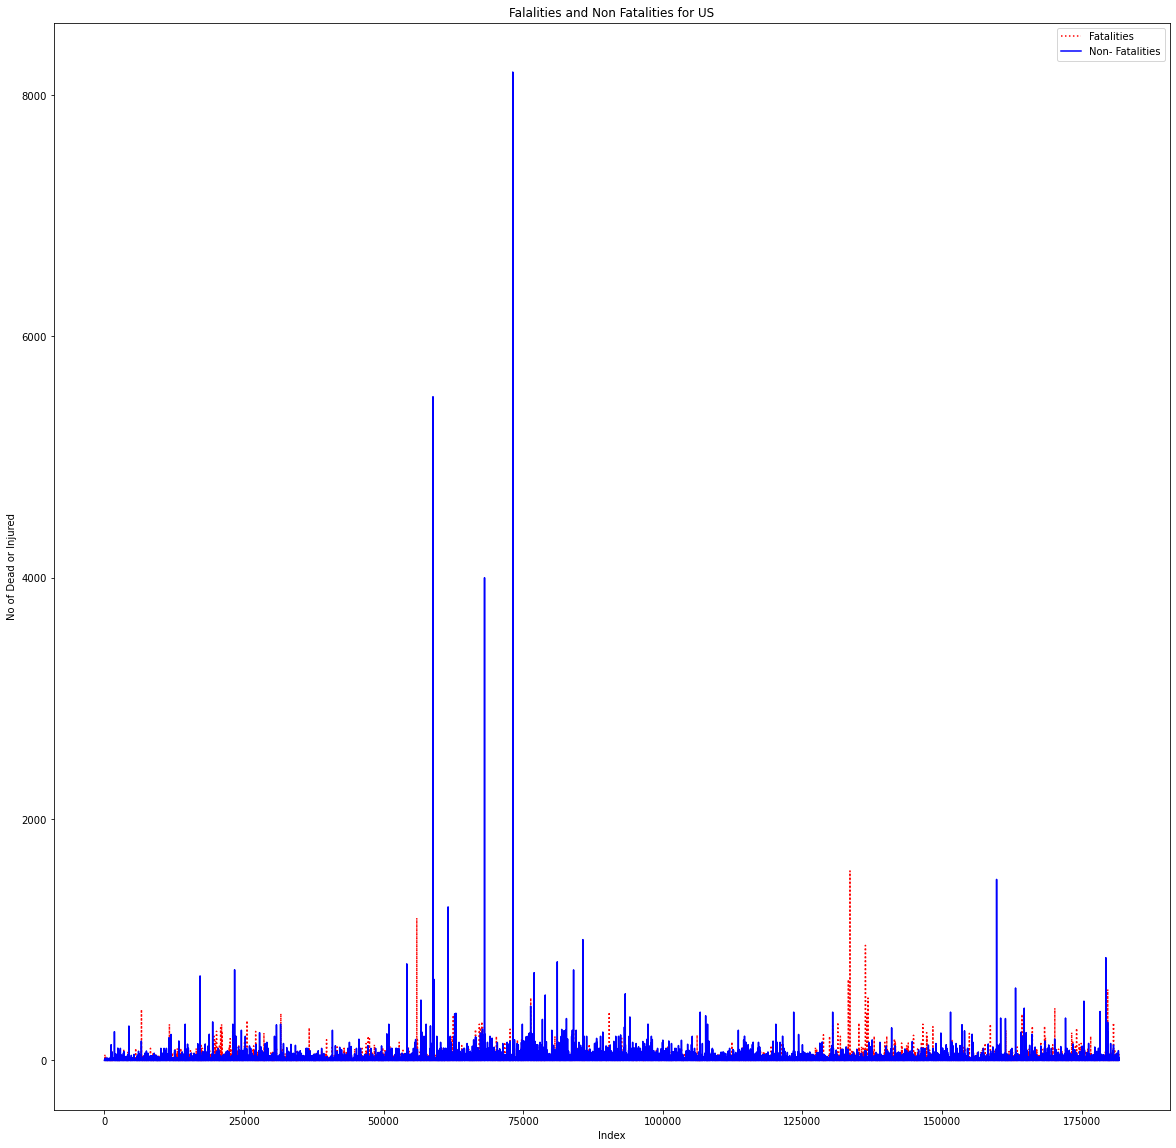

In [13]:
ter.kill.plot(kind='line', color = 'red', label = "Fatalities", linestyle =':', figsize=(20,20))
ter.Wound.plot(kind ='line', color = 'blue', label= "Non- Fatalities", linestyle = '-', figsize=(20,20) )
plt.legend(loc = 'upper right')
plt.xlabel("Index")
plt.ylabel("No of Dead or Injured")
plt.title("Falalities and Non Fatalities for US")

Attacks on US citizen seem to be very rare, but terrorist act against citizen of US seems to be increase further compared to the beginning dates. 

Text(0.5, 1.0, 'Attack in year')

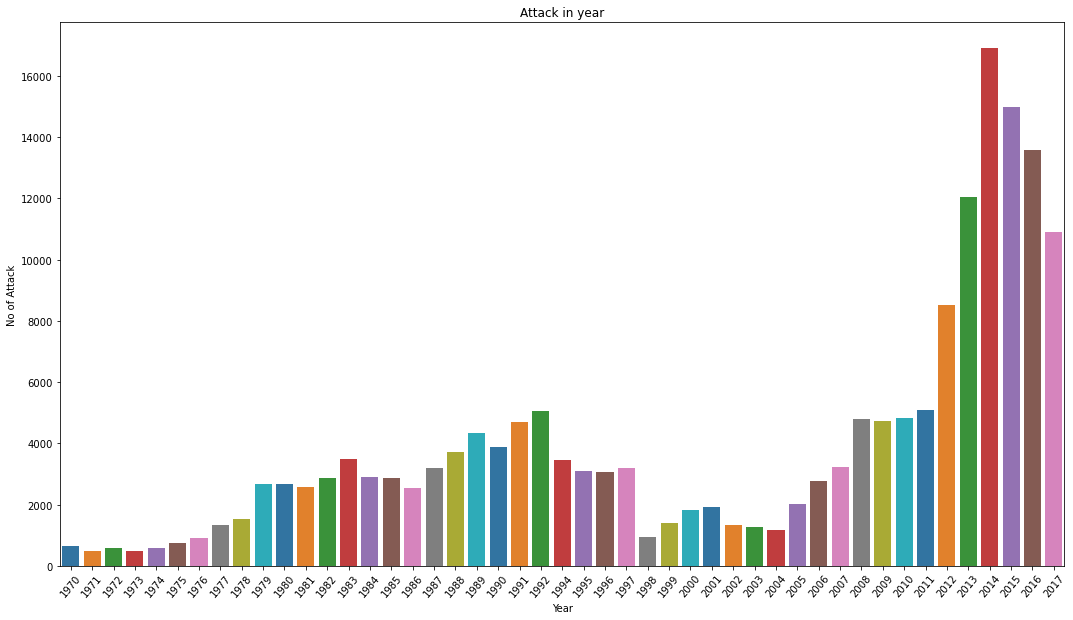

In [14]:
year = ter['Year'].unique()
yearcount = ter['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18, 10))
sns.barplot(x=year, y= yearcount, palette ='tab10')
plt.xticks(rotation = 50)
plt.xlabel("Year")
plt.ylabel("No of Attack")
plt.title("Attack in year")

Most attck occured in year 2014.

In [15]:
attack = ter.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [16]:
ter.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

Taliban is the Group with more attack

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Iraq'),
  Text(1, 0, 'Pakistan'),
  Text(2, 0, 'Afghanistan'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Colombia'),
  Text(5, 0, 'Philippines'),
  Text(6, 0, 'Peru'),
  Text(7, 0, 'El Salvador'),
  Text(8, 0, 'United Kingdom'),
  Text(9, 0, 'Turkey')])

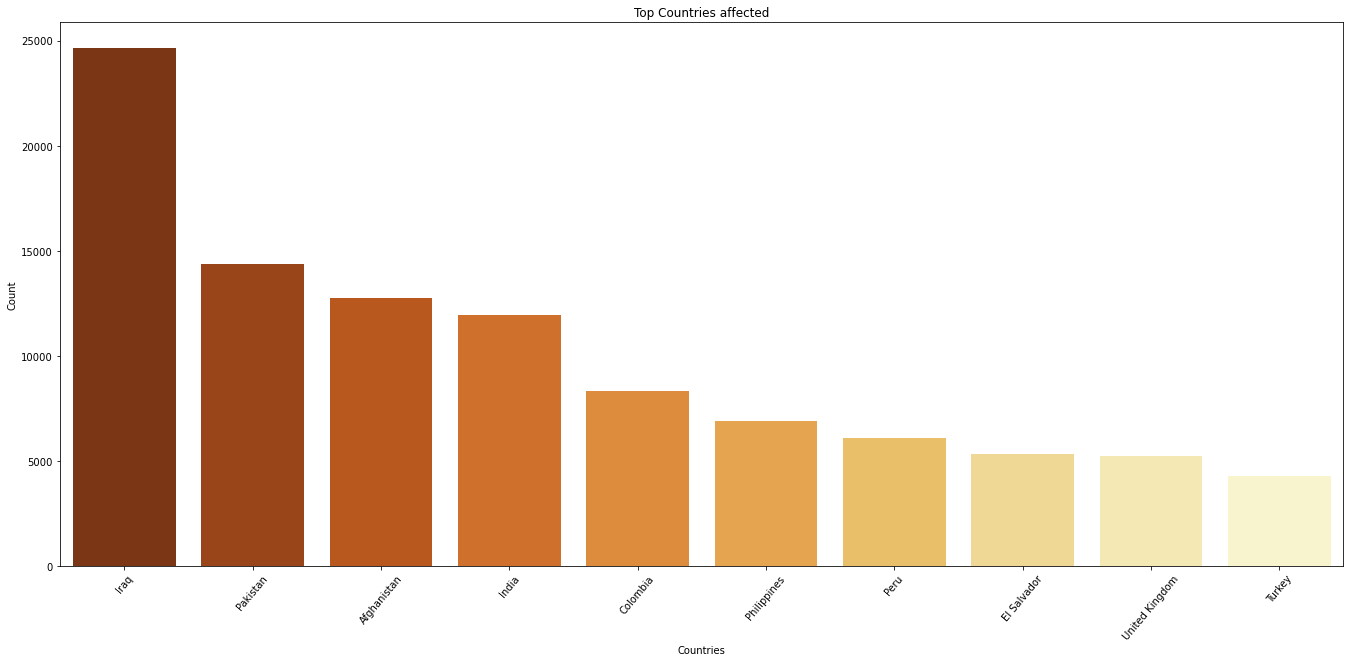

In [17]:
plt.subplots(figsize=(23,10))
sns.barplot(ter['Country'].value_counts()[:10].index, ter['Country'].value_counts()[:10].values ,palette='YlOrBr_r')
plt.title('Top Countries affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation =50)


Iraq is most attacked country.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Bombing/Explosion'),
  Text(1, 0, 'Armed Assault'),
  Text(2, 0, 'Assassination'),
  Text(3, 0, 'Hostage Taking (Kidnapping)'),
  Text(4, 0, 'Facility/Infrastructure Attack'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'Unarmed Assault'),
  Text(7, 0, 'Hostage Taking (Barricade Incident)'),
  Text(8, 0, 'Hijacking')])

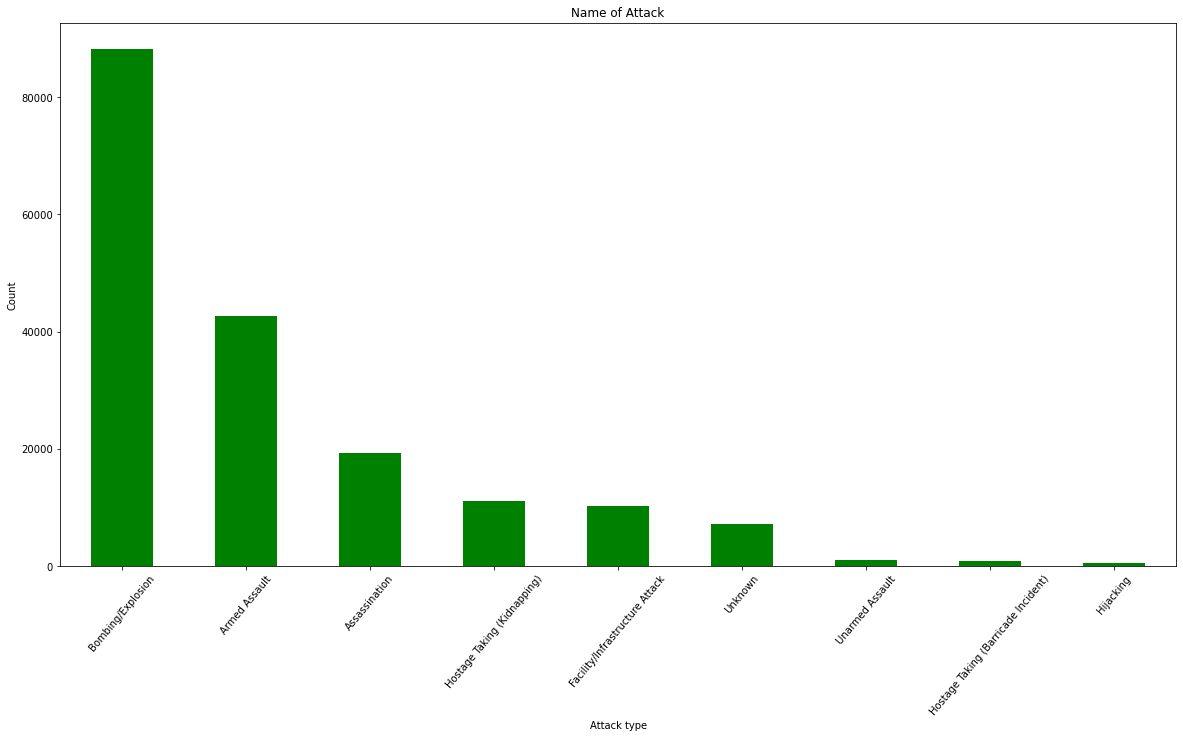

In [18]:
ter['AttackType'].value_counts().plot(kind = 'bar', figsize=(20,10), color = 'green')
plt.title('Name of Attack')
plt.xlabel('Attack type')
plt.ylabel('Count')
plt.xticks(rotation =50)

Most used Attack Type were Bombing/Explosion.

In [19]:
df = ter[['Group', 'Country', 'kill']]
df = df.groupby(['Group', 'Country'], axis = 0).sum().sort_values('kill', ascending = False).drop('Unknown')
df

,,kill
Group,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
...,...,...
Civil War Veterans,Liberia,0.0
Mustafa Aktas Fighting Unit,West Germany (FRG),0.0
Mustafa al-Hujairi Group,Lebanon,0.0


Most terror attack have occured in Middle east and North Africa.
Muslims are most damaged by terrorism, Iran and Afghanistan were most affected. More people were killed here.